# Cardiovascular Disease Classification 

Last Edited: 09/6/2020
Author: Shi Jianrong


## Preamble

Cardiovascular disease (CVD) is a class of diseases that involve the heart or blood vessels. It is the leading cause of death in all over the world except in Africa. Some of the common CVD include hypertensive heart disease, stroke, angina, arrhythmia and heart failure.

According to the World Health Organisation (WHO), it takes an estimated 17.9 million lives each year, accounting for 31% of total death worldwide. It is estimated that 75% of CVD deaths are preventable if proper treatment and intervention are administered to patients with existing CVD. A large number of researches are done throughout the years in the area of risk factors that affects the chances of getting CVD. Some of the common risk factors identified are genetics, age, gender, tobacco use, alcohol use, physical activities, diet, sleep and stress.

For patients who have not been diagnosed of CVD and who are experiencing symptoms of CVD, doctors will usually evaluate his/her risk based on individual risk factors. Further diagnosis can then be performed ,in the forms of electrocardiogram (ECG), exercise stress tests, echocardiogram, coronary angiography, magnetic resonance imaging (MRI) and computerised tomography (CT), depending on the suspected disease. 

The aim of this project is to predict if a person is suffering from CVD based on a few simple characteristics. The factors that are examined here are age, gender, height, weight, systolic blood pressure, diastolic blood pressure, cholesterol level, glucose level, tabacco use, alcohol use and physical activity. 

The project aims to leverage on machine learning (ML) techniques to effectively classify and detect CVD cases. It is intended to be used as a proof of concept that these factors can be used as a simple evaluation to tell if a potential patient may suffer from CVD. 

## Data Source

The data was obtained from Kaggle, a subsidary under Alphabet Inc. It is an online community for data scientists and ML practitioners. Kaggle allows users to explore the datasets that are uploaded by other users and develop models based on the datasets. This particular dataset is published by Svetlana Ulianova, a data analyst working at TELUS Health, based in Canada. The publisher states that all the data are collected on the moment of medical examination but the exact source of the data is not known. 

Source of data: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

## Methodology

Python will be used here to conduct exploratory data analysis (EDA), as well as to do predictive analysis. Python is chosen due to the ease of use and wide variety of libraries that can be leveraged on. A library is a piece of code that can perform certain actions that has already been written by external sources. This means that as data scientists, we do not have to develop our own code from scratch every time we perform data analysis. As ML usually leverage on constant data processing, Python is the ideal general purpose programming language that we can use, allowing us to manipulate and transform data with ease using the wide array of libraries.

Here is a table for some of the libraries that are used.

| Library | Python Library Name | Purpose |
|:---:|:---:|:---:|
| Scikit-learn | sklearn | Wide variety of ML algorithms, both classification and regression problems |
| Pandas | pandas | Reading and writing of csv file, data manipulation, operations such as merging and joining of files |
| Numpy | numpy | Methods for scientific computing and ease of data manipulation using additional data objects, e.g. arrays |
| Matplotlib | matplotlib | Plotting of static graphs and charts for visualisation |
| Seaborn | seaborn | Built on top of matplotlib to make graphs and charts more elegant, purely for aesthetic purposes |

The steps that will be performed for this machine learning project is as follows:

| Steps | Process Name | Purpose |
|:---:|:---:|:---:|
| 1 | Data Cleaning | Removing of outliers, imputing missing values |
| 2 | Data Preprocessing | Standardisation, Transformation, Normalisation, Feature Selection, Feature Engineering |
| 3 | Data Visualisation | Plotting and visualisation of datapoints on graphs |
| 4 | Model Selection | Selecting the right model |
| 5 | Training | Training the model selected using the datapoint |
| 6 | Testing | Testing on unseen data and evaluation of model performance |
| 7 | Fine Tuning | Recursive process to improve model performance by changing parameters |

From the problem statement and the data that is given, this is a binary classification problem. We are only interested to find if the patient is suffering from CVD or not based on the attributes. As such, some techniques that will be examined here will be random forest classification (RF), support vector machine (SVM) and logistic regression (LR).

## Exploratory Data Analysis

In [2]:
# import statements
import os
import copy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl

In [24]:
df = pd.read_csv("data/cardio_train.csv", sep = ";")
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [90]:
# Looking for NaN values to impute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [25]:
#make a deep copy of the raw data in case we need to access it later
dfRaw = copy.deepcopy(df)
# remove id column as it is not in running order
df.drop(['id'], axis=1, inplace=True)

#converting age to years
#converting gender: 1 is Male; 0 is Female
df['ageYear'] = df['age']/365.25
df['genderMod'] = df['gender'] - 1

df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageYear,genderMod
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.357290,1
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.381246,0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.627652,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.249144,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.841205,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,0,59.997262,0
6,22113,1,157,93.0,130,80,3,1,0,0,1,0,60.542094,0
7,22584,2,178,95.0,130,90,3,3,0,0,1,1,61.831622,1
8,17668,1,158,71.0,110,70,1,1,0,0,1,0,48.372348,0
9,19834,1,164,68.0,110,60,1,1,0,0,0,0,54.302533,0


### Data

So far from looking at the data, we can see that there is no null/ missing values. However, this does not mean that there are no invalid data as each of the attributes can still give a reading that is not physically possible. We will need to explore some of the data further to make sense of what we have. Attributes such as ageYear, genderMod, height, weight, ap_hi and ap_lo are attributes that we have to look into. I define a method that can allow me to calculate and find outliers that are below and above 1.5IQR.

In [15]:
# Function to find lower and upper bound of outlier 
def findOutlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    return lower , upper

#### 1. Age

We see that for age, there are some outliers (patient around their 30s), these are the points represented below the whiskers, which is beyond a distance of 1.5 times the Interquartile Range (IQR). As the bulk of the patient data are in their 40s-60s, it makes more sense to remove these outliers. Inspecting the results, we can see that 4 datapoints were removed.

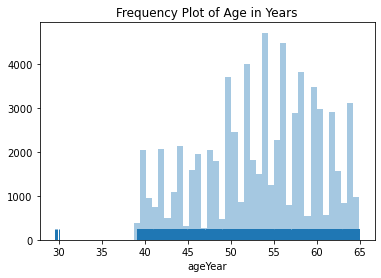

Number of datapoints that exceed 1.5 IQR: 4


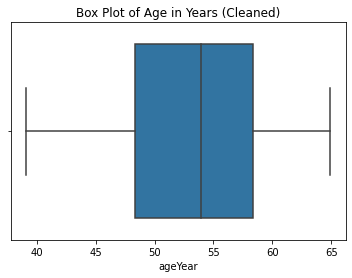

In [26]:
# Age
x = df.ageYear
ageChart = sns.distplot(x, kde=False, rug = True)
ageChart.set_title('Frequency Plot of Age in Years')
plt.show()

lowerbound , upperbound = findOutlier(df['ageYear'])
print("Number of datapoints that exceed 1.5 IQR: " + str(len(df[(df.ageYear < lowerbound) | (df.ageYear > upperbound)])))
df.drop(df[(df.ageYear < lowerbound) | (df.ageYear > upperbound)].index , inplace=True)

ageBoxplot = sns.boxplot(x=df['ageYear'])
ageBoxplot.set_title("Box Plot of Age in Years (Cleaned)")
plt.show()

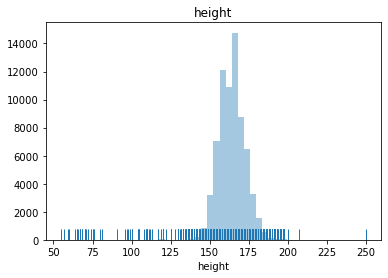

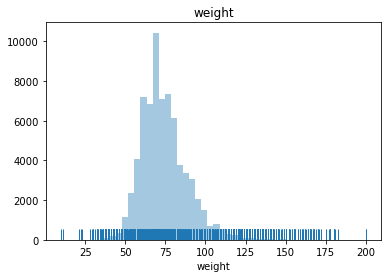

In [27]:
# Height
h = df.height
heightChart = sns.distplot(h, kde=False, rug = True)
heightChart.set_title('height')
plt.show()

# Weight
w = df.weight
weightChart = sns.distplot(w, kde=False, rug = True)
weightChart.set_title('weight')
plt.show()

#### 2. Height and Weight

We see that for height and weight, the data spread is rather large and there are a number of outliers, some of these datapoints do not make sense as majority of the patients are adults above the age of 35. For adults at this age, height of a person below 130cm is exceeding rare, and weight of a person below 30kg is also near impossible. 

Similarly to age, we use a lowerbound and an upperbound to detect the datapoints that have these results. Computing the total number of erroneous datapoints, they account for a maximum of 3% of the entire dataset, as such, removing these will not cause too much of a problem. The threshold of the bounds might still look questionable as there are definitely adults who are taller than 186.5cm and weights more than 107.5kg, but we will have to limit our analysis to this range in this case as we have to be fair in dealing with all the outliers. 

Height lowerbound: 142.5
Height upperbound: 186.5
Number of datapoints that exceed 1.5 IQR: 519


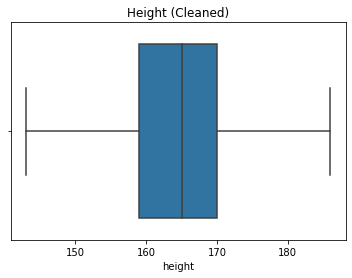

Weight lowerbound: 39.5
Weight upperbound: 107.5
Number of datapoints that exceed 1.5 IQR: 1819


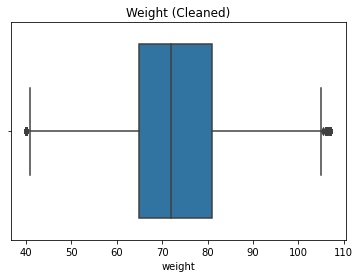

In [30]:
# Height
hLowerbound , hUpperbound = findOutlier(df['height'])
heightC = df.drop(df[(df.height < hLowerbound) | (df.height > hUpperbound)].index)
print("Height lowerbound: " + str(hLowerbound))
print("Height upperbound: " + str(hUpperbound))
print("Number of datapoints that exceed 1.5 IQR: " + str(len(df[(df.height < hLowerbound) | (df.height > hUpperbound)])))

hBoxplot = sns.boxplot(x=heightC['height'])
hBoxplot.set_title("Height (Cleaned)")
plt.show()

# Weight
wLowerbound , wUpperbound = findOutlier(df['weight'])
weightC = df.drop(df[(df.weight < wLowerbound) | (df.weight > wUpperbound)].index)
print("Weight lowerbound: " + str(wLowerbound))
print("Weight upperbound: " + str(wUpperbound))
print("Number of datapoints that exceed 1.5 IQR: " + str(len(df[(df.weight < wLowerbound) | (df.weight > wUpperbound)])))

wBoxplot = sns.boxplot(x=weightC['weight'])
wBoxplot.set_title("Weight (Cleaned)")
plt.show()

In [31]:
# Drop erroneous data
df.drop(df[(df.height < hLowerbound) | (df.height > hUpperbound)].index, inplace = True)
df.drop(df[(df.weight < wLowerbound) | (df.weight > wUpperbound)].index, inplace = True)

#### 3. ap_hi and ap_lo 
For ap_hi and ap_lo, these represents the systolic and diastolic blood pressure of a person. Knowing the range of these two measurements require domain knowledge. Systolic blood pressure can be from a range of 65 - 200, which diastolic blood pressure from a range of 40 - 140. As such, we only need to make sure that the datapoints are between these ranges.

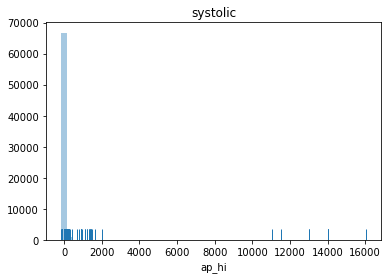

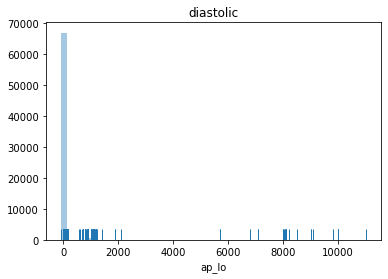

In [35]:
# Systolic
systolic = df.ap_hi
systolicChart = sns.distplot(systolic, kde=False, rug = True)
systolicChart.set_title('systolic')
plt.show()

# Diastolic
diastolic = df.ap_lo
diastolicChart = sns.distplot(diastolic, kde=False, rug = True)
diastolicChart.set_title('diastolic')
plt.show()

In [36]:
df.drop(df[(df.ap_hi < 65) | (df.ap_hi > 200)].index, inplace = True)
df.drop(df[(df.ap_lo < 40) | (df.ap_lo > 140)].index, inplace = True)

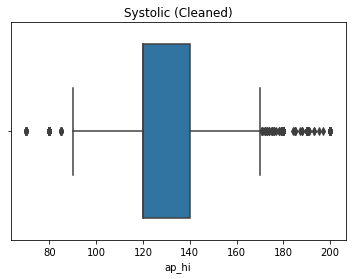

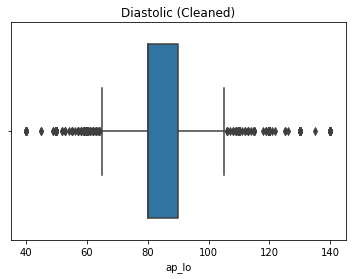

In [39]:
# Systolic
boxplot = sns.boxplot(x=df['ap_hi'])
boxplot.set_title("Systolic (Cleaned)")
plt.show()

# Diastolic
boxplot = sns.boxplot(x=df['ap_lo'])
boxplot.set_title("Diastolic (Cleaned)")
plt.show()

In [40]:
len(df)

66504